In [3]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib.pyplot as plt
import numpy as np
import time

zumi = Zumi()

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


In [4]:
zumi = Zumi()

#this is how to use drive_at_angle it is the 
#method all other methods turn and go straight are made with
max_speed = 127 # this is the max speed the motors will ever reach
forward_speed = 40 #this is speed Zumi tries to drive forward with
desired_heading = 0 #the angle we want to go towards
p_gain = 10 #the proportional error gain
d_gain = 0.4 # the derivative error gain
i_gain = 20 #the integral error gain
min_error_allowed = 0 #this is lowest amount of error before the PID activates to correct

for i in range(30):
    zumi.drive_at_angle(max_speed, forward_speed,desired_heading,
                        p_gain, d_gain, i_gain, min_error_allowed)
    
#ALWAYS have a STOP at the END of the code after drive_at_angle    
zumi.stop()

In [10]:
#The value that is returned from the drive_at_angle method is the error

#Since drive at angle uses PID their is
#a variable that measures the accumulated error
#we must reset it otherwise we get random jerky motions
zumi.reset_gyro()
zumi.reset_PID()

#the method returns the error from the desired heading
for i in range(30):
    #the method error is saved to a variable and printed
    error = zumi.drive_at_angle(127, 40,0,10, 0.4, 20, 0)
    print(error)
    
zumi.stop()

-0.000811516184600942
-0.7436147877335586
-0.7328906226773836
-0.7909668768138506
-0.8409759163299324
-0.7162026094827216
-0.9240570035812021
-0.8467162420129495
-1.0348639378104114
-0.9674632897854135
-0.8382300183453173
-0.700888714147969
-0.7691320944666763
-0.6278991315211037
-0.8150614238188778
-0.6119087271090667
-0.705907087368574
-0.7787169644454028
-0.5962186976449415
-0.5679758306427342
-0.5087754211190245
-0.6739261508764567
-0.4813364481970479
-0.6088997873215048
-0.9038350023817268
-0.15711027119845544
-0.044171634484133485
0.030919597787780737
-0.23156846196748665
-0.7394217034665895


In [19]:
#the reason we use
#zumi.reset_gyro()
#zumi.reset_PID()
#is because the error is being accumulated
print(zumi.error_sum)

-52.56918259029511


In [20]:
#now when we reset this value 
zumi.reset_gyro()
zumi.reset_PID()
print(zumi.error_sum)
#should be zero now
#you should use these each time we move to a new direction
#we only want to record the error for whatever current movement we are doing

0


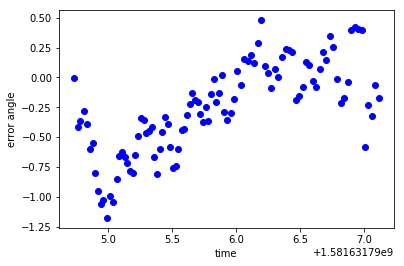

In [11]:
#we can graph this error as well to see how it varies

#reset Cumulative error
zumi.reset_gyro()
zumi.reset_PID()

#make an empty list for the error and time
error_list = []
time_list = []

for i in range(100):
    #the method error is saved to a variable and printed
    error = zumi.drive_at_angle(127, 40,0,10, 0.4, 20, 0)
    
    #add the error value to the list
    error_list.append(error)
    time_list.append(time.time())
    
zumi.stop()

#now we will plot the amount of error.
#we want the points to be as close to 0 as possible.
plt.plot(time_list,error_list,'bo')
plt.ylabel('error angle')
plt.xlabel('time')
plt.show()

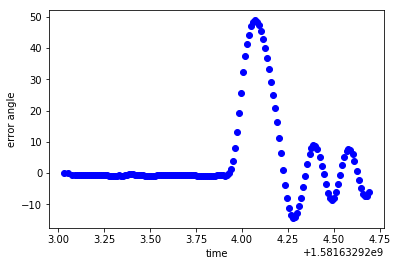

In [23]:
#now we can play with the PID values
#try setting some to 0 or some different value

p_gain = 20
#P is zumi response to current error
#so if the measure angle is 10 degrees 
#and the desired is 0 then this error =10-0 will be multiplied by the P gain
#if only p_gain is used it will work but be very very sensitive by abrupt changes
#such as a push will cause it to oscillate like crazy

d_gain = 0
#the D gain is "intertia" or resistance to change 
#if only this value is being set Zumi will try not move

i_gain = 0
#i gain is error accumulated example say the Zumi 
#is driving off by 1 degree over time this error will add up
#if only p = 0 d = 0 and i = (something) the zumi will oscillate like crazy

#reset Cumulative error
zumi.reset_gyro()
zumi.reset_PID()

#make an empty list for the error and time
error_list = []
time_list = []

for i in range(150):
    #the method error is saved to a variable and printed
    error = zumi.drive_at_angle(127, 40,0,p_gain, d_gain, i_gain, 0)
    
    #add the error value to the list
    error_list.append(error)
    time_list.append(time.time())
    
zumi.stop()

#now we will plot the amount of error.
#we want the points to be as close to 0 as possible.
plt.plot(time_list,error_list,'bo')
plt.ylabel('error angle')
plt.xlabel('time')
plt.show()

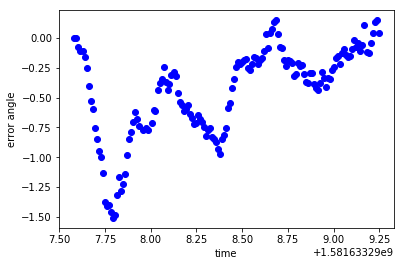

In [30]:
p_gain = 10
d_gain = 0.1
i_gain = 20
#you can find the values that best fit your Zumi
#some hints if your Zumi has a constant error of like +-10 in the graph then increase the I gain
#if your Zumi corrects but way to slowly increase the P gain.
#if your Zumi corrects to fast increase the d gain. increase its resistance to change

#reset Cumulative error
zumi.reset_gyro()
zumi.reset_PID()

#make an empty list for the error and time
error_list = []
time_list = []

for i in range(150):
    #the method error is saved to a variable and printed
    error = zumi.drive_at_angle(127, 40,0,p_gain, d_gain, i_gain, 0)
    
    #add the error value to the list
    error_list.append(error)
    time_list.append(time.time())
    
zumi.stop()

#now we will plot the amount of error.
#we want the points to be as close to 0 as possible.
plt.plot(time_list,error_list,'bo')
plt.ylabel('error angle')
plt.xlabel('time')
plt.show()

 Starting Zumi 
Pi Zero I2C is available
Gyro offset file already exists.
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
4.103448275862069  volts
Creating new offset file...
.
266


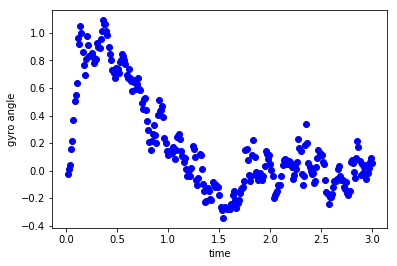

pred error deg/s  21.123767479496973
slope int  23.217136584512797


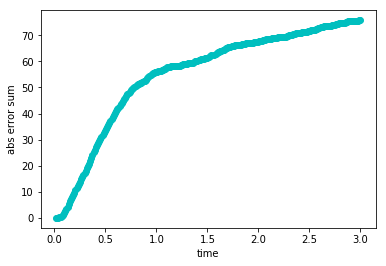

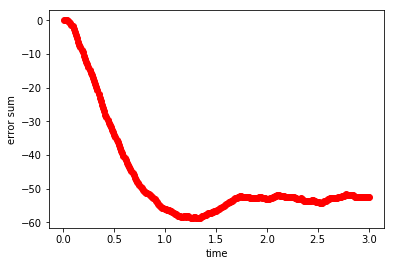

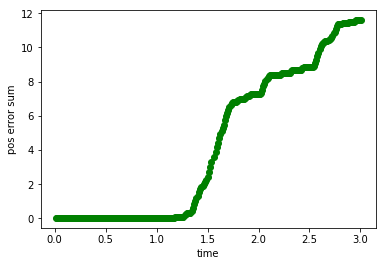

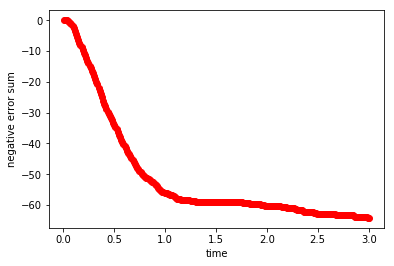

In [18]:
motor_speed = 40
time_out = 3

zumi = Zumi()
zumi.MIN_I2C_DELAY = 0.0
print(zumi.get_battery_voltage()," volts")
zumi.reset_gyro()
zumi.mpu.calibrate_MPU(50)


#create list for the readings to be graphed
time_list = []


ang_z_list = []
error_list = []
error_plus = []
error_minus = []
err_sum_list = []
error_sum = 0
error_sum_p = 0
error_sum_n = 0

time_passed = 0

heading = 0


init_time = time.time()  
       
while(True):
    #zumi.go_straight(motor_speed,heading,accuracy=0.0)
    zumi.drive_at_angle(127, motor_speed, heading, 10, 0.4, 20, 0)

    time_passed = time.time()-init_time

    #add data to lists
    time_list.append(time_passed)
    
    #record the z angle
    ang_z_list.append(zumi.angle_list[2])
    
    #find the amount of error from desired heading
    error = heading - zumi.angle_list[2]
    if error > 0:
        error_sum_p = abs(error) + error_sum_p

    elif error < 0:
        error_sum_n = error + error_sum_n
        
    error_plus.append(error_sum_p)        
    error_minus.append(error_sum_n)
    error_sum = abs(error)+error_sum
    error_list.append(error_sum)   
    err_sum_list.append(zumi.error_sum)
    #program should end if timeout or number of bricks
    if time_passed > time_out:
        break
print(len(time_list))
zumi.hard_brake()

plt.plot(time_list,ang_z_list,'bo')
plt.ylabel('gyro angle')
plt.xlabel('time')
plt.show()

m, b = np.polyfit(time_list, error_list, 1)
print("pred error deg/s ", m)
print("slope int ",b)

plt.plot(time_list,error_list,'co')
plt.ylabel('abs error sum')
plt.xlabel('time')
plt.show()

plt.plot(time_list,err_sum_list,'ro')
plt.ylabel('error sum')
plt.xlabel('time')
plt.show()

plt.plot(time_list,error_plus,'go')
plt.ylabel('pos error sum')
plt.xlabel('time')
plt.show()

plt.plot(time_list,error_minus,'ro')
plt.ylabel('negative error sum')
plt.xlabel('time')
plt.show()
